In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

K = np.array([[215.6810060961547, 0.0, 376.5], [0.0, 215.6810060961547, 240.5], [0.0, 0.0, 1.0]],dtype=np.float32)

In [46]:


base = cv.imread("base.png", cv.IMREAD_GRAYSCALE)

#imgs de 0 ate 2023

init = 220
end = 2023

for i in range(init, end):
    name = "/home/elton/Documentos/GitHub/drone_data/Bases/img/frame" + ((4-len(str(i)))*"0"+str(i)) + ".jpg"

    img = cv.imread(name)

    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    kernel = np.ones((5,5),"uint8")

    #Filtragem da cor azul
    min_azul = np.array([115,60,50], np.uint8)
    max_azul = np.array([125,255,255], np.uint8)
    masc_azul = cv.inRange(hsv,min_azul,max_azul)
    masc_azul = cv.dilate(masc_azul,kernel)
    masc_azul = cv.dilate(masc_azul,kernel)


    min_amarelo = np.array([25,40,200], np.uint8)
    max_amarelo = np.array([35,255,255], np.uint8)
    masc_amarelo = cv.inRange(hsv,min_amarelo,max_amarelo)
    masc_amarelo = cv.dilate(masc_amarelo,kernel)

    #masc = cv.bitwise_or(masc_azul,masc_amarelo)

    masc = masc_azul

    res = cv.bitwise_and(img,img,mask=masc)

    kernel = np.ones((5,5),np.uint8)



    #masc = cv.morphologyEx(masc, cv.MORPH_OPEN, kernel, iterations=1)


    #masc = cv.morphologyEx(masc, cv.MORPH_CLOSE, kernel, iterations=1)
    #masc = cv.morphologyEx(masc, cv.MORPH_OPEN, kernel, iterations=10)
    #masc = cv.morphologyEx(masc, cv.MORPH_CLOSE, kernel, iterations=10)
    #masc = cv.erode(masc, kernel, iterations=50)

    quadrados = procuraQuadrado(masc)

    salvaTodosQuadrados(quadrados, res, i-init)


In [5]:
def procuraQuadrado(mascara):
    kernel = np.ones((5,5),np.uint8)
    
    bordas = cv.Canny(mascara, 100, 500, kernel)

    try:
        contours,hierarchy = cv.findContours(bordas, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    except:
        _, contours,hierarchy = cv.findContours(bordas, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    quadrados = []

    for i in range(len(contours)):
        epsilon = 0.1*cv.arcLength(contours[i],True)
        approx = cv.approxPolyDP(contours[i],epsilon,True)

        if(len(approx) < 4):
            continue

        if not cv.isContourConvex(approx):
            continue

        if cv.contourArea(approx) < 1000:
            continue

        quadrado = []

        for point in approx:
            quadrado.append([point[0][0], point[0][1]])
        
        quadrados.append(quadrado)

    quadrados = np.array(quadrados)

    i = 0

    while(len(quadrados)-2 >= i):
        if np.linalg.norm(quadrados[i+1][0]-quadrados[i][0]) < 5:
            quadrados = np.delete(quadrados, i, 0)
            
        i+=1

    i = 0

    while len(quadrados) > i:
        if np.linalg.norm(quadrados[i][0]-quadrados[i][1])/np.linalg.norm(quadrados[i][2]-quadrados[i][1]) <0.9:
           quadrados = np.delete(quadrados, i, 0) 
        i+=1

    i = 0

    while(len(quadrados) > i):
        

        mask = np.zeros(masc.shape,np.uint8)
        cv.drawContours(mask,[quadrados[i]],0,255,-1)
        pixelpoints = np.transpose(np.nonzero(mask))


        zero = 0
        naoZero = 0

        for j in range(len(pixelpoints)):
            if masc[pixelpoints[j, 0], pixelpoints[j,1]] == 0:
                zero+=1
            else:
                naoZero+=1

        razao = float(zero)/float(naoZero)

        #print(razao)

        if(razao>0.05):
            quadrados = np.delete(quadrados, i, 0)

        i+=1

    return quadrados



In [6]:
def imprimeQuadrado(quadrado, img):
    imgDraw = img.copy()
    
    for point in quadrado:
        cv.circle(imgDraw, (point[0], point[1]), 10, (255,0,255), -1)

    plt.imshow(cv.cvtColor(imgDraw,cv.COLOR_BGR2RGB))
    plt.show()

def imprimeTodosQuadrados(quadrados, img):
    for quad in quadrados:
        imprimeQuadrado(quad, img)


def salvaTodosQuadrados(quadrados, img, i):
    imgDraw = img.copy()
    
    for quad in quadrados:
        for point in quad:
            cv.circle(imgDraw, (point[0], point[1]), 5, (255,0,255), -1)

    cv.imwrite("result/"+str(i)+".png", imgDraw)

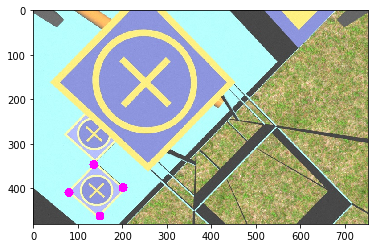

In [7]:
name = "/home/elton/Documentos/GitHub/drone_data/Bases/img/frame" + ((4-len(str(269)))*"0"+str(269)) + ".jpg"

img = cv.imread(name)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

kernel = np.ones((5,5),"uint8")

#Filtragem da cor azul
min_azul = np.array([115,60,50], np.uint8)
max_azul = np.array([125,255,255], np.uint8)
masc_azul = cv.inRange(hsv,min_azul,max_azul)
masc_azul = cv.dilate(masc_azul,kernel)
masc_azul = cv.dilate(masc_azul,kernel)


min_amarelo = np.array([25,40,200], np.uint8)
max_amarelo = np.array([35,255,255], np.uint8)
masc_amarelo = cv.inRange(hsv,min_amarelo,max_amarelo)
masc_amarelo = cv.dilate(masc_amarelo,kernel)

#masc = cv.bitwise_or(masc_azul,masc_amarelo)

masc = masc_azul

res = cv.bitwise_and(img,img,mask=masc)

kernel = np.ones((3,3),np.uint8)



#masc = cv.morphologyEx(masc, cv.MORPH_OPEN, kernel, iterations=1)


#masc = cv.morphologyEx(masc, cv.MORPH_CLOSE, kernel, iterations=1)
#masc = cv.morphologyEx(masc, cv.MORPH_OPEN, kernel, iterations=10)
masc = cv.morphologyEx(masc, cv.MORPH_CLOSE, kernel, iterations=1)
#masc = cv.erode(masc, kernel, iterations=50)

quadrados = procuraQuadrado(masc)

imprimeTodosQuadrados(quadrados, img)

In [8]:
quadrados[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [41]:
np.linalg.norm(quadrados[1][0]-quadrados[1][1]) / np.linalg.norm(quadrados[1][2]-quadrados[1][1])

0.98739868531255226

0.96663159676872068

84.291162051546067

87.200917426366559